In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu   Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


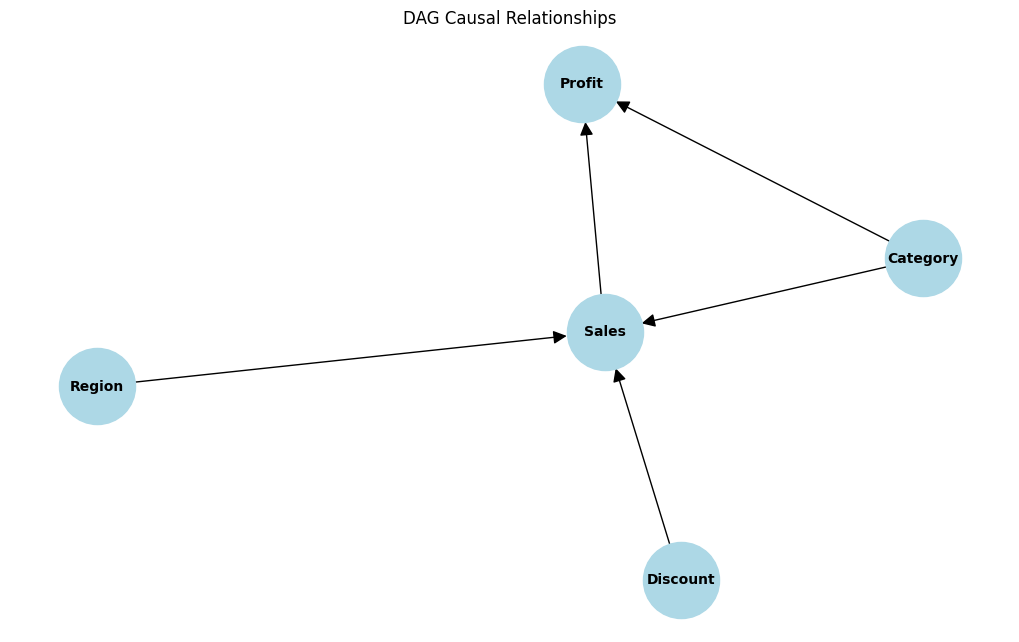

In [6]:


file_path = 'datasets/data_set_3.csv'
supermart_data = pd.read_csv(file_path)

print(supermart_data.head(), supermart_data.columns)

dag = nx.DiGraph()
nodes = ["Sales", "Discount", "Profit", "Category", "Region"]
dag.add_nodes_from(nodes)

edges = [
    ("Discount", "Sales"),     # Discount има влијание врз Sales
    ("Sales", "Profit"),       # Sales има влијание врз Profit
    ("Category", "Sales"),     # Категорија можно е да има влијание врз Sales
    ("Region", "Sales"),       # Region можно е да има влијание врз Sales
    ("Category", "Profit")     # Category можно е да има директно влијание врз Профит.
]
dag.add_edges_from(edges)

# Цртање на DAG
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(dag)  
nx.draw(dag, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title("DAG Causal Relationships")
plt.show()